In [ ]:
# might need to install this libaries:
# pip install --upgrade mplfinance

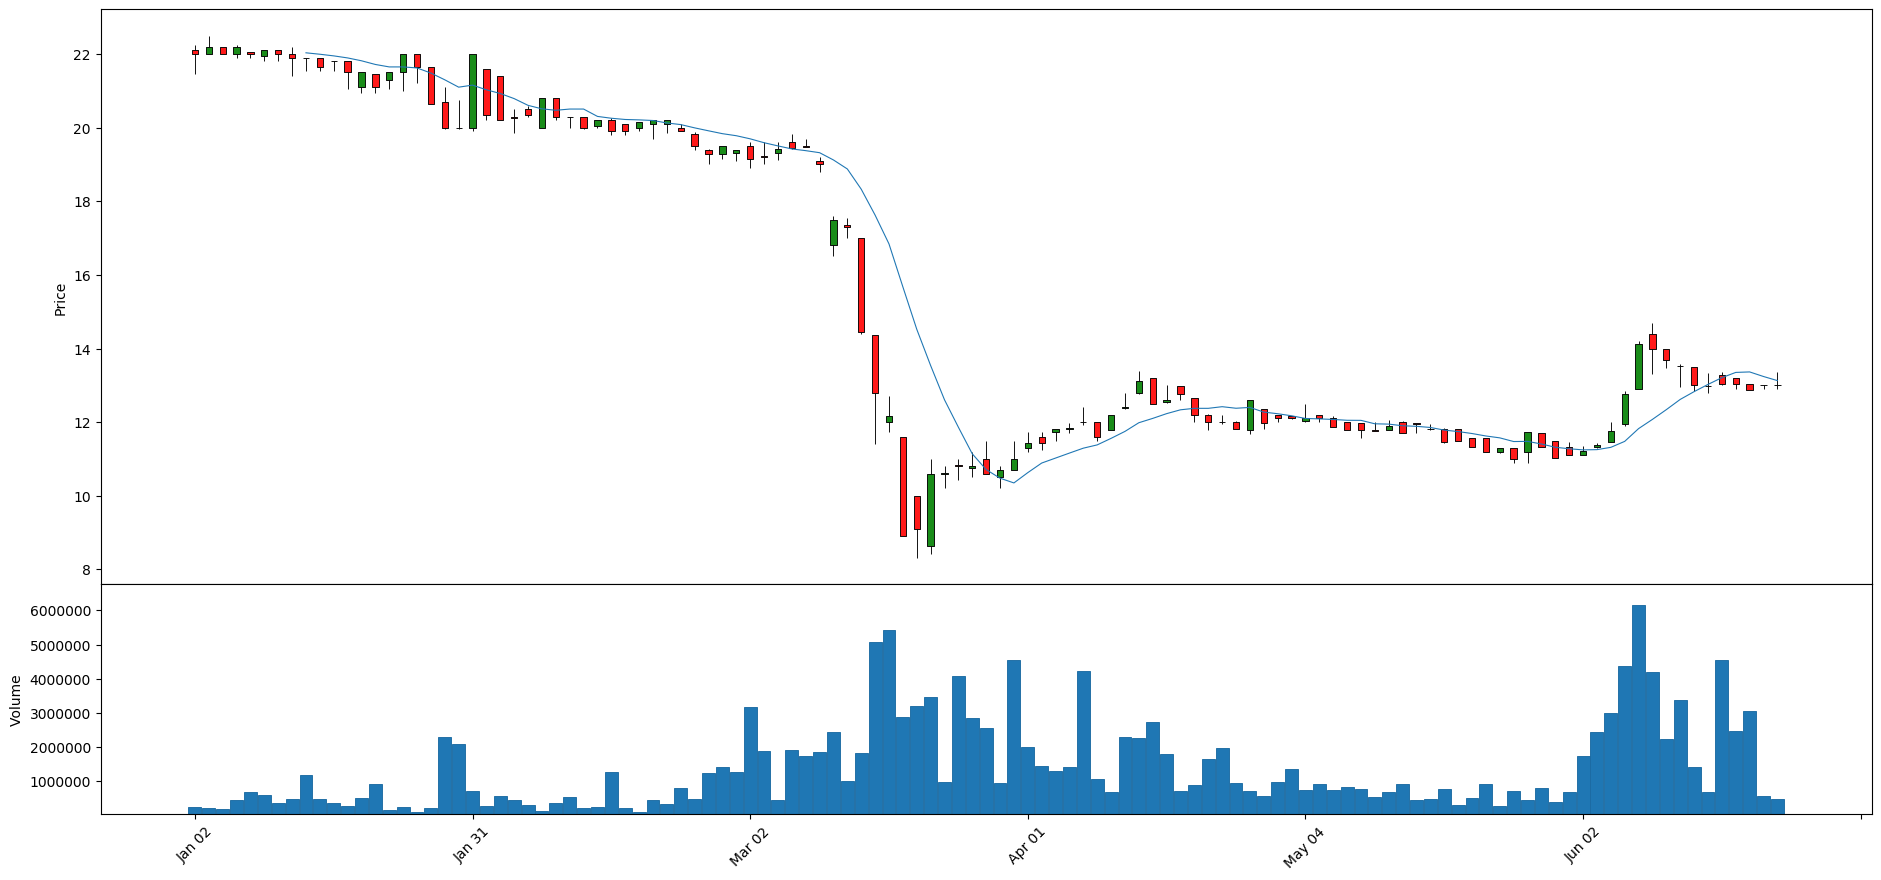

In [45]:
#For Plotting Candle Sticks

from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
import csv
import datetime
import os.path
from os import path
import mplfinance as mpf

#Symbol Date Bid Ask Open High Low Close Volume Net Foreign Buying/(Selling)Php

from_date = datetime.datetime(2020, 1, 1)
to_date = datetime.datetime(2020, 6, 23)
delta = datetime.timedelta(days=1)
selector = 'SCC'

header = ['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Net_Foreign']

date_cover = from_date.strftime("%b %d %y %a") + ' - ' + to_date.strftime("%b %d %y %a")

#print(date_cover)
csvfiles = []
tmp = from_date
while tmp <= to_date:
    csvfiles.append('stockQuotes_'+tmp.strftime("%m%d%Y")+'.csv')
    tmp = tmp + delta

df = pd.DataFrame()

#print('Files read:')
for i in range(0,len(csvfiles)):
    
    str = csvfiles[i]
    
    fname = str[16:20] + chr(92) + csvfiles[i]
    #fname = '2020' + chr(92) + csvfiles[i]
    if path.exists(fname) == True:
        #print(fname)
        data = pd.read_csv(fname, header=None, names = header, index_col = ['Symbol'])
        df = pd.concat([df,data])

print('\n')

df_select = df.loc[[selector]]
#print(df)

df_select = df_select.set_index(pd.DatetimeIndex(df_select['Date']))

# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',mav=(9), volume=True,figratio=(11,5),figscale=2)

mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df_select, **kwargs, style=s)

In [15]:
# # Print close only
# print('\n')
# df_sel_np = df_select[['Close']].to_numpy()
# max_len = len(df_sel_np)
# x = np.arange(0, max_len, 1).tolist()
# fig = plt.figure(figsize=(18,9))
# ax = fig.gca()
# ax.set_xticks(np.arange(0, max(x), 1))
# ax.set_xlim(xmin=0,xmax=max(x))
# plt.title('Stock Performance of ' + selector + ' (' + date_cover + ')', fontsize=20)
# plt.plot(x,df_sel_np, color='darkgreen', linewidth=0.5)